In [16]:
import numpy as np #linear algrbra
import pandas as pd # data processing ,CSV file
import matplotlib.pyplot as plt
import seaborn as sns


In [17]:
data = pd.read_csv('My Uber Drives - 2016.csv')

In [18]:
#Get a picture of the data to see its range categories
data.head()


,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/16 21:11,1/1/16 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/16 1:25,1/2/16 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/16 20:25,1/2/16 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/16 17:31,1/5/16 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/16 14:42,1/6/16 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [19]:
data.shape

(1156, 7)

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   START_DATE*  1156 non-null   object 
 1   END_DATE*    1155 non-null   object 
 2   CATEGORY*    1155 non-null   object 
 3   START*       1155 non-null   object 
 4   STOP*        1155 non-null   object 
 5   MILES*       1156 non-null   float64
 6   PURPOSE*     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [21]:
data.isnull().sum()

START_DATE*      0
END_DATE*        1
CATEGORY*        1
START*           1
STOP*            1
MILES*           0
PURPOSE*       503
dtype: int64

In [22]:
data[data['END_DATE*'].isnull()]

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
1155,Totals,NaN,NaN,NaN,NaN,12204.7,NaN


In [23]:
data.drop(data.index[1155],inplace=True)

In [24]:
#search for duplicated data to drop from data
data[data.duplicated()]

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
492,6/28/16 23:34,6/28/16 23:59,Business,Durham,Cary,9.9,Meeting


In [25]:
data.drop_duplicates(inplace=True)

In [26]:
#zero trip time and null miles must be removed.
data.isnull().sum()

START_DATE*      0
END_DATE*        0
CATEGORY*        0
START*           0
STOP*            0
MILES*           0
PURPOSE*       502
dtype: int64

In [27]:
data[data['START_DATE*']== data['END_DATE*']]

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
751,9/6/16 17:49,9/6/16 17:49,Business,Unknown Location,Unknown Location,69.1,NaN
761,9/16/16 7:08,9/16/16 7:08,Business,Unknown Location,Unknown Location,1.6,NaN
798,10/8/16 15:03,10/8/16 15:03,Business,Karachi,Karachi,3.6,NaN
807,10/13/16 13:02,10/13/16 13:02,Business,Islamabad,Islamabad,0.7,NaN


In [29]:
#Converting "Start_date"& End_date" to datetime format
data['START_DATE*']=pd.to_datetime(data['START_DATE*'])
data['END_DATE*']=pd.to_datetime(data['END_DATE*'])

/Users/ricardobenitez/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


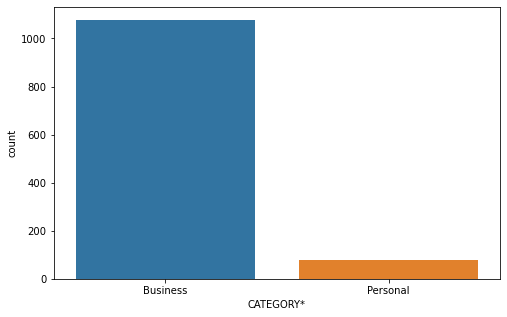

In [30]:
#Building a Uber Purpose model to show ridership purpose
plt.figure(figsize=(8,5))
sns.countplot(data['CATEGORY*'])
plt.show()

/Users/ricardobenitez/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PURPOSE*', ylabel='count'>

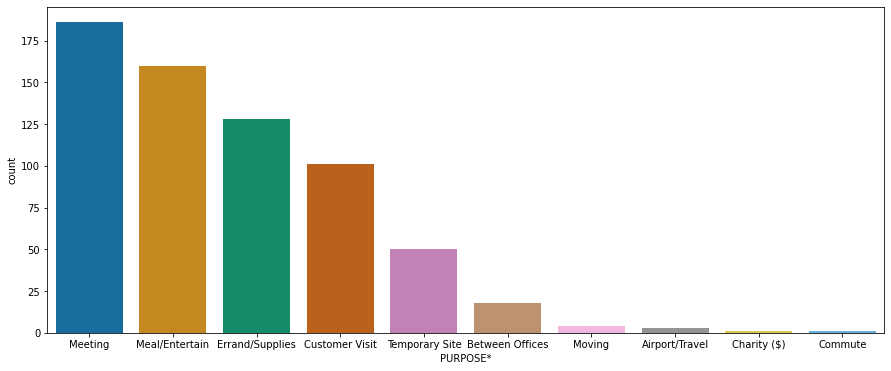

In [31]:
#Plotting the Frequencies of Purpose of Trips
plt.figure(figsize=(15,6))
sns.countplot(data['PURPOSE*'], order=data['PURPOSE*'].value_counts().index, palette='colorblind')

/Users/ricardobenitez/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ROUND_TRIP*', ylabel='count'>

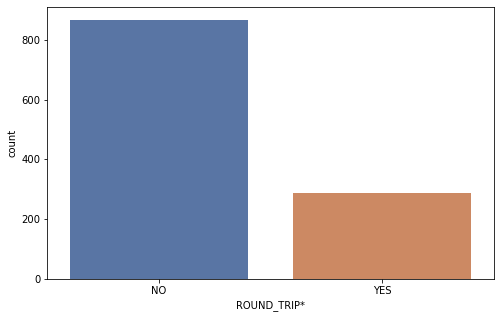

In [34]:
#Make a function for round trips start and stop points that are the same
plt.figure(figsize=(8,5))
def round(x):
    if x['START*']== x['STOP*']:
        return 'YES'
    else:
        return 'NO'
    
data['ROUND_TRIP*']=data.apply(round, axis=1)
sns.countplot(data['ROUND_TRIP*'], order=data['ROUND_TRIP*'].value_counts().index,palette='deep')

In [35]:
data['MONTH*'] = pd.DatetimeIndex(data['START_DATE*']).month

In [36]:
dic = {1:'Jan', 2: 'Feb', 3: 'Mar', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'Aug', 9: 'Sep',
      10: 'Oct', 11: 'Nov', 12: 'Dec' }

data['MONTH*'] = data['MONTH*'].map(dic)

/Users/ricardobenitez/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


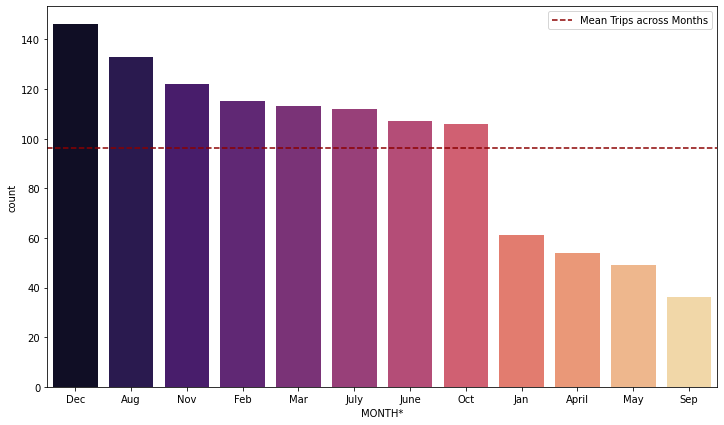

In [37]:
#Round trips in Months
plt.figure(figsize=(12,7))
sns.countplot(data['MONTH*'], order=data['MONTH*'].value_counts().index, palette='magma')
plt.axhline(data['MONTH*'].value_counts().mean(),linestyle='--', color = 'darkred', label='Mean Trips across Months')
plt.legend()
plt.show()

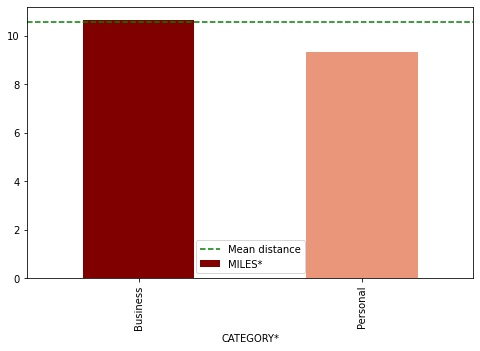

In [38]:
#Distance of trips Category
plt.figure(figsize=(8,5))
data.groupby('CATEGORY*')['MILES*'].mean().plot.bar(color=['maroon','darksalmon'])
plt.axhline(data['MILES*'].mean(), linestyle='--', color='green', label='Mean distance')
plt.legend()
plt.show()

/Users/ricardobenitez/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


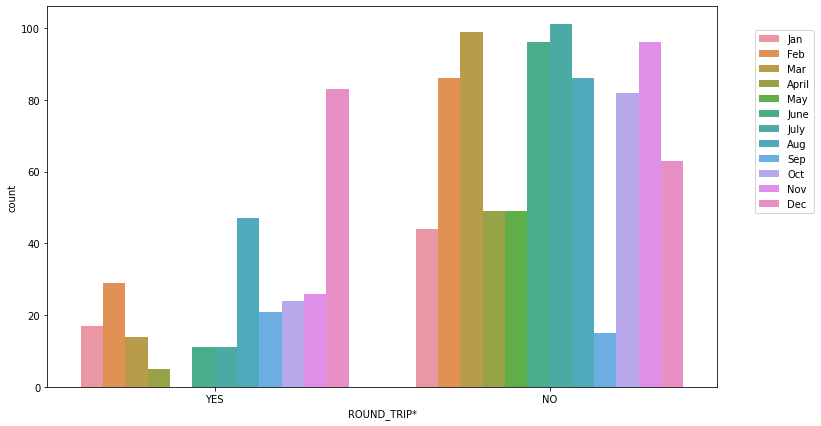

In [40]:
plt.figure(figsize=(12,7))
a=sns.countplot(data['ROUND_TRIP*'],hue=data['MONTH*'])
plt.legend(bbox_to_anchor=(1.05, 0.95), loc=2)
plt.show()

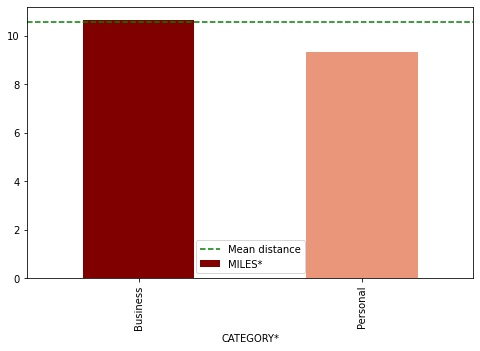

In [41]:
plt.figure(figsize=(8,5))
data.groupby('CATEGORY*')['MILES*'].mean().plot.bar(color=['maroon','darksalmon'])
plt.axhline(data['MILES*'].mean(), linestyle='--', color='green', label='Mean distance')
plt.legend()
plt.show()

In [42]:
#Get which day has the highest number of trips
def day(x):
    day = x['START_DATE*'].day_name()
    return day

data['DAY*'] = data.apply(day, axis=1)

/Users/ricardobenitez/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


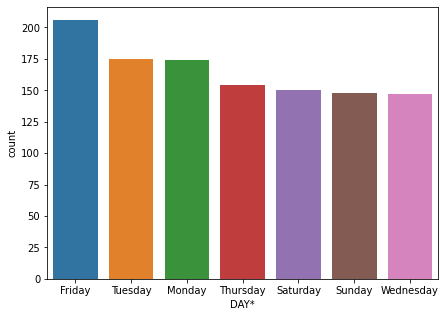

In [43]:
plt.figure(figsize=(7,5))
sns.countplot(data['DAY*'], order = data['DAY*'].value_counts().index)
plt.show()

/Users/ricardobenitez/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


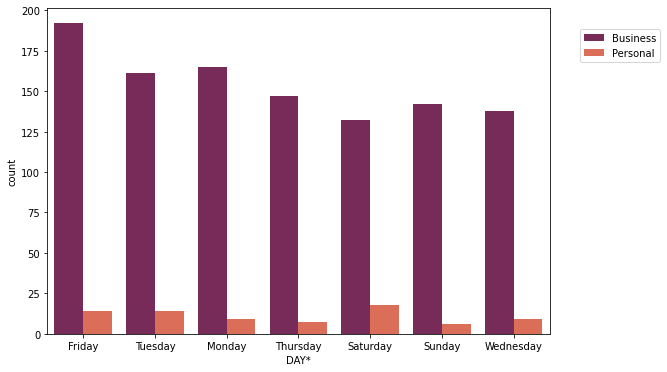

In [44]:
#categories of trips per day
plt.figure(figsize=(9,6))
a=sns.countplot(data['DAY*'],hue=data['CATEGORY*'], palette='rocket',
                order=data['DAY*'].value_counts().index)
plt.legend(bbox_to_anchor=(1.05, 0.95), loc=2)
plt.show()

/Users/ricardobenitez/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


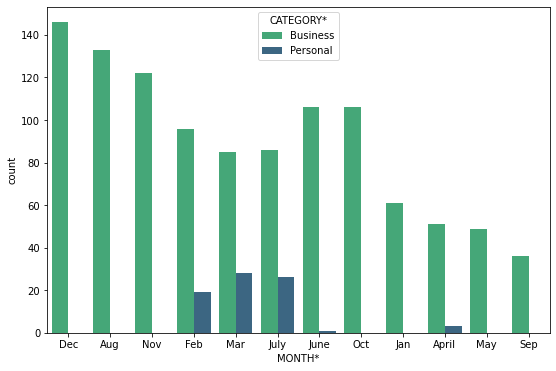

In [45]:
#category of trip per month
plt.figure(figsize=(9,6))
sns.countplot(data['MONTH*'],hue=data['CATEGORY*'], palette = 'viridis_r',
              order=data['MONTH*'].value_counts().index)
plt.show()

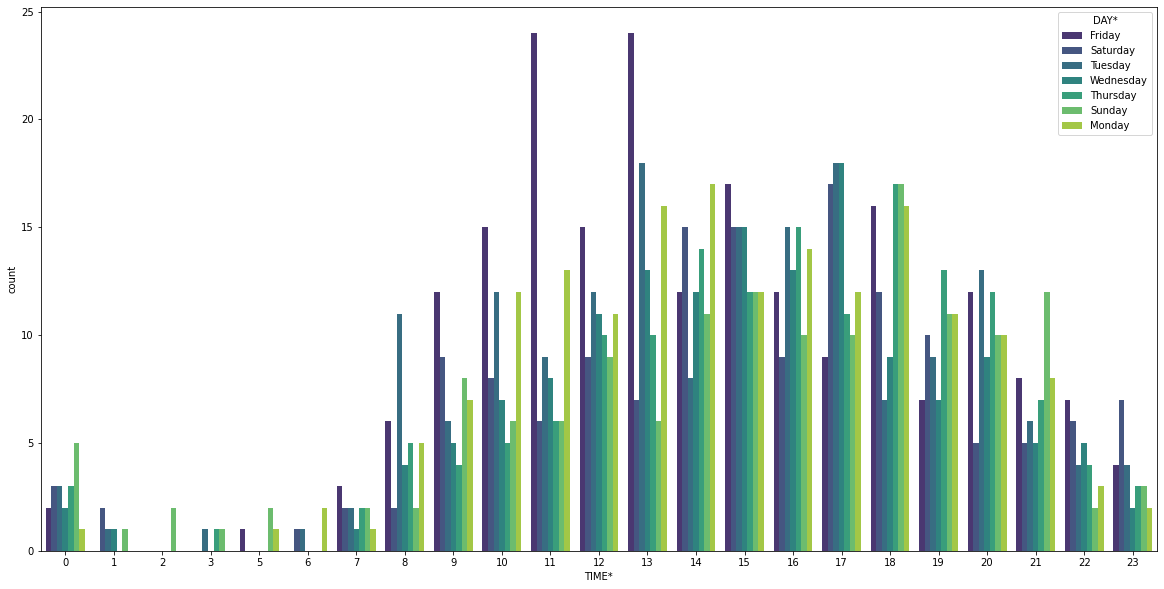

In [46]:
#Find which hours of the day the highest trips are made
data['TIME*'] = data['START_DATE*'].dt.hour

plt.figure(figsize=(20,10))
sns.countplot(data=data, x=data['TIME*'], hue=data['DAY*'],
              palette="viridis", )
plt.show()

In [ ]:
#Peak hours are Friday 11am -12pm



/Users/ricardobenitez/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


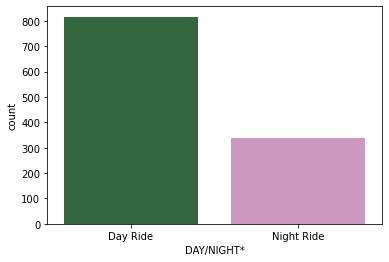

In [47]:
#Establishes how many trip are made Day time and Nights.
a = pd.to_datetime(['18:00:00']).time

data['DAY/NIGHT*'] = data.apply(lambda x : 'Night Ride' if x['START_DATE*'].time() > a else 'Day Ride', axis=1)

sns.countplot(data['DAY/NIGHT*'], palette='cubehelix' , order = data['DAY/NIGHT*'].value_counts().index)
plt.show()

/Users/ricardobenitez/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


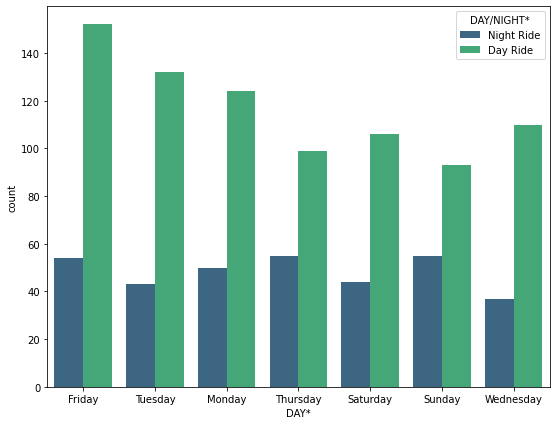

In [48]:
#Day/nights against Days
plt.figure(figsize=(9,7))
sns.countplot(data['DAY*'], hue=data['DAY/NIGHT*'], palette='viridis' ,
              order=data['DAY*'].value_counts().index)
plt.show()

In [ ]:
# Highest number of Day rides were on Friday while Night rides were on Sunday/Thursday

/Users/ricardobenitez/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


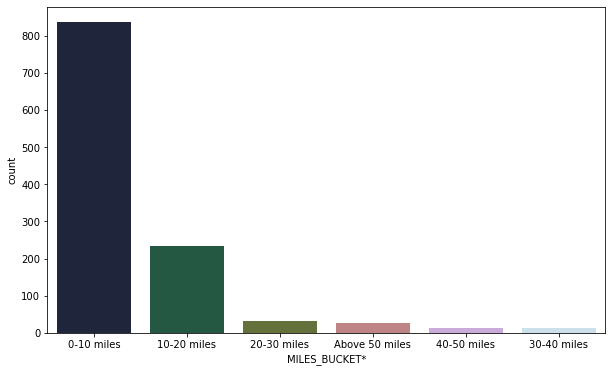

In [49]:
# Converting miles into Miles_buckets
f = {}

for i in data['MILES*']:
    for i in data['MILES*']:
        if i < 10:
            f.setdefault(i,'0-10 miles')
        elif i >= 10 and i < 20:
            f.setdefault(i,'10-20 miles')
        elif i >= 20 and i < 30:
            f.setdefault(i,'20-30 miles')
        elif i >= 30 and i < 40:
            f.setdefault(i,'30-40 miles')
        elif i >= 40 and i < 50:
            f.setdefault(i,'40-50 miles')
        else:
            f.setdefault(i,'Above 50 miles')
            
data['MILES_BUCKET*'] = data['MILES*'].map(f)

plt.figure(figsize=(10,6))
sns.countplot(data['MILES_BUCKET*'], palette='cubehelix' ,
              order = data['MILES_BUCKET*'].value_counts().index)
plt.show()